# Kaggle's Titanic Competition

## Part 1: Exploratory Analysis
in this first part, let's explore the dataset in order to learn about the features and the problem to solve:

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Feature Information:

1. PassengerId: index for each passenger
2. Survived: if the passenger survived (1 = yes, 0 = no)
3. Pclass: ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
4. Name: passenger name
5. Sex: sex (Male, Female)
6. Age: age in years
7. SibSp: # of siblings / spouses aboard the Titanic
8. Parch: # of parents / children aboard the Titanic
9. Ticket: ticket number
10. Fare: passenger fare
11. Cabin: cabin number
12. Embarked: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [2]:
# Importing training dataset
dftrain = pd.read_csv('train.csv')
dftrain.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
# Checking data types
dftrain.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# Adjusting some data, in order to make analysis more feasible
# Sex: let's use 1 for 'male' and 2 for 'female'
# Embarked: Let's use 1 for 'Cherbourg', 2 for 'Queenstown' and 3 for 'Southampton'

dftrain['Sex2'] = dftrain['Sex'].apply(lambda x: 1 if x == 'male' else 2)
dftrain['Embarked2'] = dftrain['Embarked'].apply(lambda x: 1 if x == 'C' else 2 if x == 'Q' else 3)

In [5]:
# Statistical summary 
dftrain.iloc[:, 1:].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex2,Embarked2
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.352413,2.536476
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.791503
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000,2.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,3.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000,3.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000,3.000000


By studying the features correlations, it is possible to observe that they are weakly correlated with each other.'Fare' is more strongly correlated with 'Pclass', wich makes sense, since the Cabine class is determined by the price of the ticket. Even so, the Pearson coefficient is around -0.55, wich is not so strong. This indicates that we do not need to apply a PCA method to this case, a very important information to our job.

Is also possible to observe that the features that individually affected more a passenger probability of survival were 'Pclass' (-0.338), 'Fare' (0.257) and 'Sex' (0.543). Appereantly, the most wealthy passangers and female were more likely to survive to the acident. This is probably the result of a prioritization schema that favored these groups.

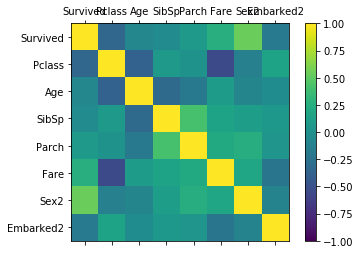

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex2,Embarked2
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.167675
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.162098
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,-0.030394
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,0.068230
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,0.039798
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,-0.224719
Sex2,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,-0.108262
Embarked2,-0.167675,0.162098,-0.030394,0.068230,0.039798,-0.224719,-0.108262,1.000000


In [6]:
# Correlation Matrix
correlations = dftrain.iloc[:, 1:].corr()
colunas = list(correlations.columns)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 8, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()

correlations

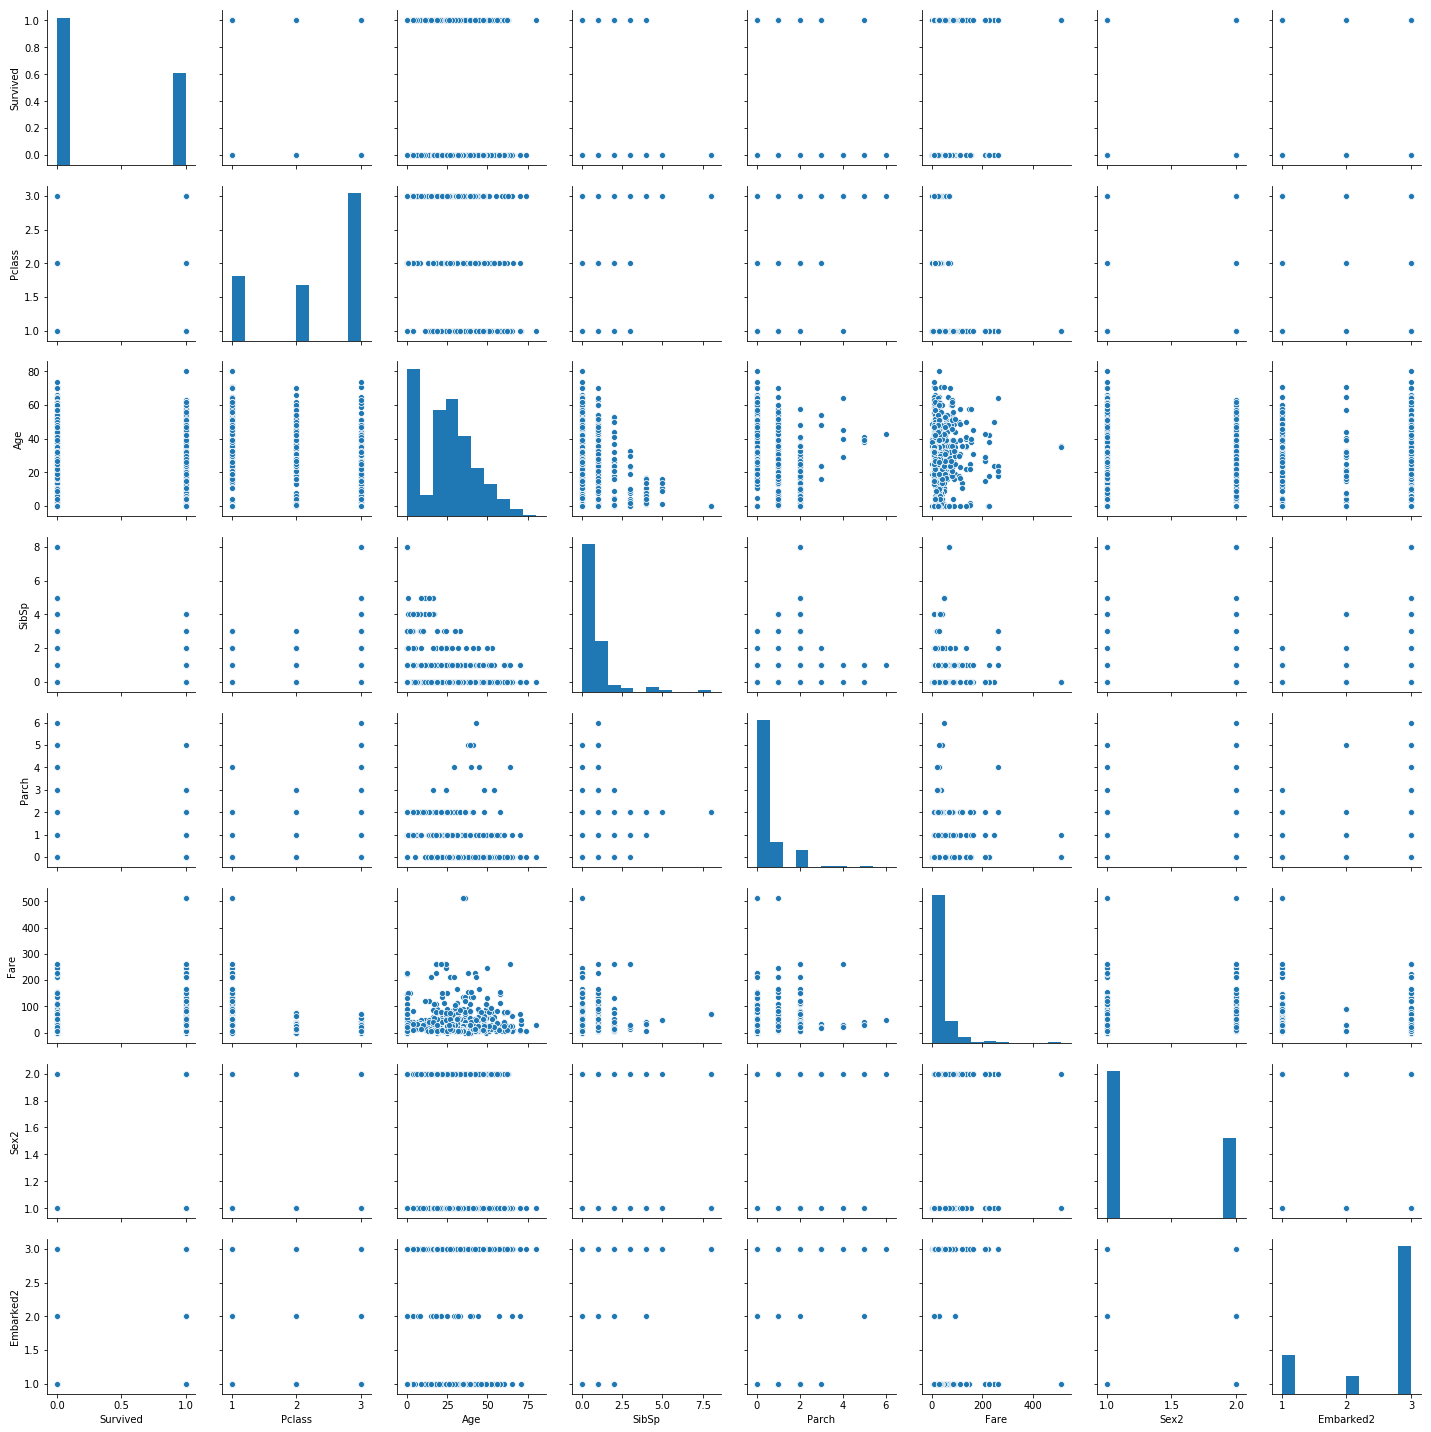

In [7]:
# View on Seaborn

# Pairplot
dftrain['Age'] = dftrain["Age"].replace(np.nan, 0)
df1 = dftrain.loc[:, colunas]
sns.pairplot(df1)
plt.show()

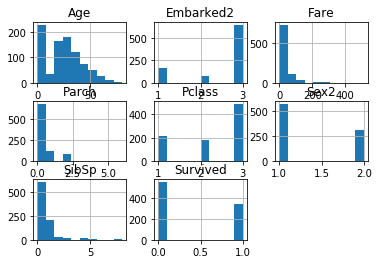

In [8]:
# Features Histograms
df1.hist(layout=(3,3), sharex=False)
plt.show()

## Part 2: Develop a machine learning model from the training dataset

in this part, let's pre process our dataset, apply and test several classfication algorithms and evaluate their accuracy

In [9]:
# Importing sklearn modules
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

C:\Users\593477\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
# Preparing dataset
dtrain = df1[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex2', 'Embarked2', 'Survived']]
array = dtrain.values

X = array[:, 0:7]
Y = array[:, 7]

LR: 0.791 (0.035)
LDA: 0.778 (0.036)
KNN: 0.697 (0.035)
NB: 0.783 (0.019)
DTC: 0.788 (0.037)
SVC: 0.698 (0.051)
XGB: 0.825 (0.036)
RDF: 0.804 (0.031)


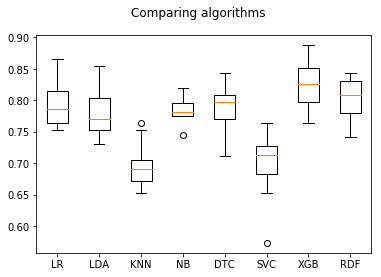

In [11]:
# Creating a list of classification models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('XGB', GradientBoostingClassifier()))
models.append(('RDF', RandomForestClassifier()))
#models.append(('KME', KMeans()))

# Applying models on training dataset and evaluating their accuracy
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cross_val_result = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    
    results.append(cross_val_result)
    names.append(name)
    
    text = '%s: %.3f (%.3f)' % (name, cross_val_result.mean(), cross_val_result.std())
    print(text)

fig = plt.figure()
fig.suptitle('Comparing algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Scl-LR: 0.783 (0.037)
Scl-LDA: 0.778 (0.036)
Scl-KNN: 0.799 (0.035)
Scl-NB: 0.783 (0.019)
Scl-DTC: 0.787 (0.039)
Scl-SVC: 0.824 (0.042)
Scl-XGB: 0.826 (0.035)
Scl-RDF: 0.809 (0.039)


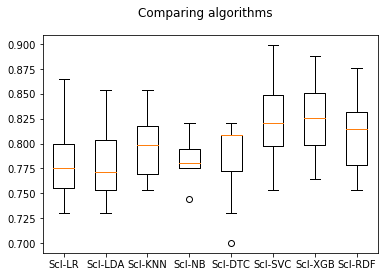

In [12]:
# Now, we repeat the process, but standardizating the features scales, in order to improve accuracy
# Let's use the pipeline resource to leverage our job
pipelines = []
pipelines.append(('Scl-LR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('Scl-LDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scl-KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('Scl-NB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('Scl-DTC', Pipeline([('Scaler', StandardScaler()), ('DTC', DecisionTreeClassifier())])))
pipelines.append(('Scl-SVC', Pipeline([('Scaler', StandardScaler()), ('SVC', SVC())])))
pipelines.append(('Scl-XGB', Pipeline([('Scaler', StandardScaler()), ('XGB', GradientBoostingClassifier())])))
pipelines.append(('Scl-RDF', Pipeline([('Scaler', StandardScaler()), ('RDF', RandomForestClassifier())])))
#pipelines.append(('Scl-KME', Pipeline([('Scaler', StandardScaler()), ('KME', KMeans())])))

# Applying models on training dataset and evaluating their accuracy
results = []
names = []

for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cross_val_result = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    
    results.append(cross_val_result)
    names.append(name)
    
    text = '%s: %.3f (%.3f)' % (name, cross_val_result.mean(), cross_val_result.std())
    print(text)

fig = plt.figure()
fig.suptitle('Comparing algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Standardizating the features scales, there were two models that better fit our data: XGboost and Support Vector Classfier.
Now, let's apply them both to choose the most suitable.

In [13]:
# Using GridSearch ro optimize XGB parameters
# Defining Scale
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# Defining values for parameters n_estimator and learning_rate:
n_estim = [100, 500, 1000]
l_rate = [0.1, 0.5, 1.0]
m_dep = [1, 2, 3]
values_grid = dict(n_estimators = n_estim, learning_rate = l_rate, max_depth = m_dep)

# Creating model
xgb = GradientBoostingClassifier()

# Testing parameters combinations
kfold = model_selection.KFold(n_splits=10, random_state=7)

grid = model_selection.GridSearchCV(estimator=xgb, param_grid=values_grid, 
                                    cv = kfold, scoring='accuracy', return_train_score=True)
grid_result = grid.fit(rescaledX, Y)

# Evaluating model tunning
mean_score = [mean for mean in grid_result.cv_results_['mean_test_score']]
std_score = [mean for mean in grid_result.cv_results_['std_test_score']]
params_score = [mean for mean in grid_result.cv_results_['params']]

# Output
print('Best accuracy: %.4f using %s' % (grid_result.best_score_, grid_result.best_params_), '\n')
i = 0
for param in params_score:
    print('%.4f (%.4f) with %r' % (mean_score[i], std_score[i], param))
    i = i + 1;


Best accuracy: 0.8294 using {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000} 

0.8002 (0.0332) with {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
0.8058 (0.0240) with {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}
0.8137 (0.0234) with {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 1000}
0.8058 (0.0335) with {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.8260 (0.0310) with {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}
0.8294 (0.0315) with {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}
0.8238 (0.0353) with {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.8148 (0.0422) with {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.8070 (0.0469) with {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
0.8058 (0.0186) with {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 100}
0.8171 (0.0250) with {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 500}
0.8182 (0.0268)

In [14]:
# Using GridSearch ro optimize SVC parameters
# Defining Scale
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# Defining values for parameters n_estimator and learning_rate:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
values_grid = dict(C = c_values, kernel = kernel_values)

# Creating model
svc = SVC()

# Testing parameters combinations
kfold = model_selection.KFold(n_splits=10, random_state=7)

grid = model_selection.GridSearchCV(estimator=svc, param_grid=values_grid, 
                                    cv = kfold, scoring='accuracy', return_train_score=True)
grid_result = grid.fit(rescaledX, Y)

# Evaluating model tunning
mean_score = [mean for mean in grid_result.cv_results_['mean_test_score']]
std_score = [mean for mean in grid_result.cv_results_['std_test_score']]
params_score = [mean for mean in grid_result.cv_results_['params']]

# Output
print('Best accuracy: %.4f using %s' % (grid_result.best_score_, grid_result.best_params_))
i = 0
for param in params_score:
    print('%.4f (%.4f) with %r' % (mean_score[i], std_score[i], param))
    i = i + 1;

Best accuracy: 0.8272 using {'C': 2.0, 'kernel': 'rbf'}
0.7868 (0.0394) with {'C': 0.1, 'kernel': 'linear'}
0.7419 (0.0430) with {'C': 0.1, 'kernel': 'poly'}
0.8036 (0.0306) with {'C': 0.1, 'kernel': 'rbf'}
0.7710 (0.0445) with {'C': 0.1, 'kernel': 'sigmoid'}
0.7868 (0.0394) with {'C': 0.3, 'kernel': 'linear'}
0.7980 (0.0404) with {'C': 0.3, 'kernel': 'poly'}
0.8137 (0.0337) with {'C': 0.3, 'kernel': 'rbf'}
0.7183 (0.0374) with {'C': 0.3, 'kernel': 'sigmoid'}
0.7868 (0.0394) with {'C': 0.5, 'kernel': 'linear'}
0.8025 (0.0408) with {'C': 0.5, 'kernel': 'poly'}
0.8171 (0.0340) with {'C': 0.5, 'kernel': 'rbf'}
0.6992 (0.0330) with {'C': 0.5, 'kernel': 'sigmoid'}
0.7868 (0.0394) with {'C': 0.7, 'kernel': 'linear'}
0.8092 (0.0426) with {'C': 0.7, 'kernel': 'poly'}
0.8238 (0.0376) with {'C': 0.7, 'kernel': 'rbf'}
0.6880 (0.0288) with {'C': 0.7, 'kernel': 'sigmoid'}
0.7868 (0.0394) with {'C': 0.9, 'kernel': 'linear'}
0.8081 (0.0383) with {'C': 0.9, 'kernel': 'poly'}
0.8227 (0.0385) with {'C':

The XGBoost model showed the higher accuracy. Now, let's refine the model parameters in order to improve it even more. Here we have tunned  2 parameters:'n_estimator' (from 100 to 1000) and and 'max_depth' (from 3 to 2).

The best accuracy obtained was 82.9% with a standard deviation of 3.15%. When applied on the test dataset, a score of 74.6% was obtained.

In [15]:
# Fitting the selected model
xgb = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=2)
xgb.fit(rescaledX, Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

## Part 3: Applying the model on the test dataset

In [16]:
# Importing test dataset
dftest = pd.read_csv('test.csv')
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
# Preparing dataset, just like it was done on the training fase
dftest['Sex2'] = dftest['Sex'].apply(lambda x: 1 if x == 'male' else 2)
dftest['Embarked2'] = dftest['Embarked'].apply(lambda x: 1 if x == 'C' else 2 if x == 'Q' else 3)
dftest['Age'] = dftest["Age"].replace(np.nan, 0)
dftest['Fare'] = dftest["Fare"].replace(np.nan, 0)

dtest = dftest[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex2', 'Embarked2']]
X_tst = dtest.values
X_tst

array([[ 3.    , 34.5   ,  0.    , ...,  7.8292,  1.    ,  2.    ],
       [ 3.    , 47.    ,  1.    , ...,  7.    ,  2.    ,  3.    ],
       [ 2.    , 62.    ,  0.    , ...,  9.6875,  1.    ,  2.    ],
       ...,
       [ 3.    , 38.5   ,  0.    , ...,  7.25  ,  1.    ,  3.    ],
       [ 3.    ,  0.    ,  0.    , ...,  8.05  ,  1.    ,  3.    ],
       [ 3.    ,  0.    ,  1.    , ..., 22.3583,  1.    ,  1.    ]])

In [18]:
# Adjusting scale
scalerval = StandardScaler().fit(X_tst)
rescaledvalX = scalerval.transform(X_tst)

# Applying the model (XGBoost)
Survived_XGB_val = xgb.predict(rescaledvalX)

In [19]:
# Creating the arqchive with the predictions
dftest['Survived'] = Survived_XGB_val
dftest['Survived'] = dftest['Survived'].apply(lambda x: int(x))
output = dftest[['PassengerId', 'Survived']]
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [20]:
output.groupby('Survived').count()

,PassengerId
Survived,
0,279
1,139


In [21]:
# Exporting csv to submission
output.to_csv('gender_submission.csv', encoding='utf-8', index=False)

# End